Trinôme G1 :
- 191931066239, AMAZOUZ Sara Selma
- 191931045284, GHENAIET Walid
- 191931089336, MOULAI Mohamed Youcef


---



# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
print("X")
print(X)
print("y")
print(y)
y = y.reshape(y.shape[0],1)

X
[[ 1.      6.9247 15.605 ]
 [ 1.      6.0573  8.779 ]
 [ 1.      7.1695 14.58  ]
 [ 1.     12.037  17.262 ]
 [ 1.     15.807  15.069 ]
 [ 1.      9.0167 11.263 ]
 [ 1.     12.221  19.302 ]
 [ 1.     15.005   9.3108]
 [ 1.     15.22   17.484 ]
 [ 1.     16.887   8.7067]
 [ 1.     19.172   7.6451]
 [ 1.     15.003   6.1207]
 [ 1.     16.461  15.296 ]
 [ 1.     13.873  19.544 ]
 [ 1.      7.9077 15.207 ]
 [ 1.     10.794  17.841 ]
 [ 1.     13.814  10.548 ]
 [ 1.     13.589   9.3357]
 [ 1.     14.132  18.585 ]
 [ 1.     15.396   9.5152]
 [ 1.     13.474   8.5677]
 [ 1.     17.935  13.16  ]
 [ 1.     10.107   9.7712]
 [ 1.      6.8424  8.8419]
 [ 1.     15.585  13.794 ]
 [ 1.     12.454  13.991 ]
 [ 1.     16.038   8.9643]
 [ 1.     18.623   7.7601]
 [ 1.     12.366  10.051 ]
 [ 1.      7.7572 12.999 ]
 [ 1.     12.276  14.562 ]
 [ 1.     17.081  11.41  ]
 [ 1.     10.422  12.626 ]
 [ 1.     10.409  13.887 ]
 [ 1.      8.0474 14.234 ]
 [ 1.     10.927  10.443 ]
 [ 1.      6.7831 19.774 ]

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

In [ ]:
def prediction(X, theta):
  return np.dot(X, theta)

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte

    # calculer le coût avec et sans vectorisation,
    # comparer le temps de traitement
    wahed = np.ones((y.shape[0], 1)).astype(float)
    y_preds = Sigmoid(prediction(X, theta))

    return (-1) * ( np.dot(y.transpose(), np.log(y_preds)) + np.dot((wahed - y).transpose(), np.log(wahed - y_preds)) ) / y.shape[0]

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération
    # pour afficher le coût en fonction de theta0 et theta1

    thetas = []
    costs = []

    for i in range(iterations):

      # feed forward
      cost = computeCost(X, y, theta)

      # sauvegarde des couts & thetas
      costs.append(cost)
      thetas.append(np.array(theta))

      # calcul des derivees & modification des poids thetas (back propagation)
      for j in range(X.shape[1]):
        d = np.dot(np.array(X[:,j]).transpose(), (Sigmoid(prediction(X, theta)) - y)) / y.shape[0]
        theta[j] -= alpha * d

    return np.array(thetas), np.array(costs)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta = theta.astype(float)
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
initialCost

array([[0.69314718]])

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 10000
alpha = 0.052
# Appel
thetas, costs = gradientDescent(X, y, theta, alpha, iterations)

In [ ]:
finalCost = costs[-1]
finalCost

array([[0.25002751]])

In [ ]:
finalThetas = thetas[-1]
finalThetas

array([[-11.96222885],
       [  0.50495791],
       [  0.47434326]])

Traçage de la fonction du coût

In [ ]:
def plot_cost(costs):
  plt.plot(costs.reshape(costs.shape[0],1))
  plt.xlabel('Itérations')
  plt.ylabel('Coût')
  plt.title("Coût en fonction des itérations")
  plt.show()

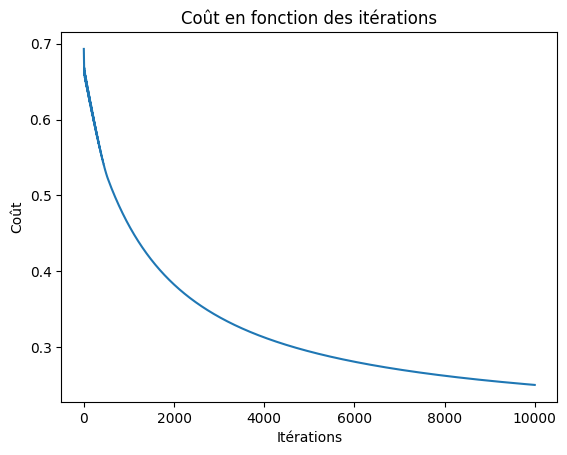

In [ ]:
plot_cost(costs)

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

fonction de prediction des classes

In [ ]:
def predict_class(X, theta):
  y_pred = Sigmoid(prediction(X, theta))
  for i in range(y_pred.shape[0]):
    y_pred[i] = 0 if y_pred[i] <= 0.5 else 1
  return y_pred

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine(X, y, theta):

    a = X[:, 1].min()
    b = X[:, 1].max()

    # Calculer the new values of a & b, pour the decision boundary line
    new_a = (-theta[0] - theta[1]* a) / theta[2]
    new_b = (-theta[0] - theta[1]* b) / theta[2]

    plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
    plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

    plt.plot([a, b], [new_a, new_b], label='sigmoid function', color='green')
    plt.xlabel('Note module 1')
    plt.ylabel('Note module 2')
    plt.show()

 *** Decision Boundary *** 


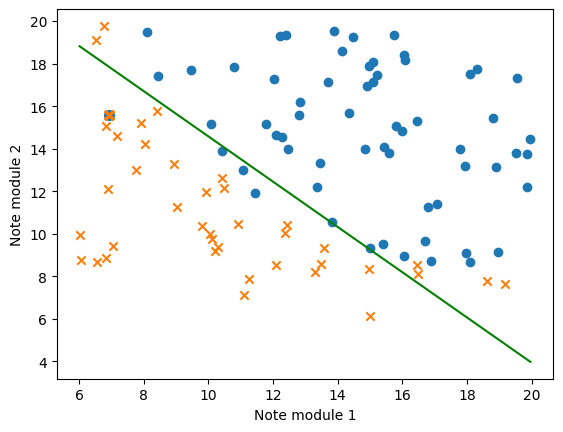

In [ ]:
print(" *** Decision Boundary *** ")
drawLine(X, y, finalThetas)

# Affichage
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

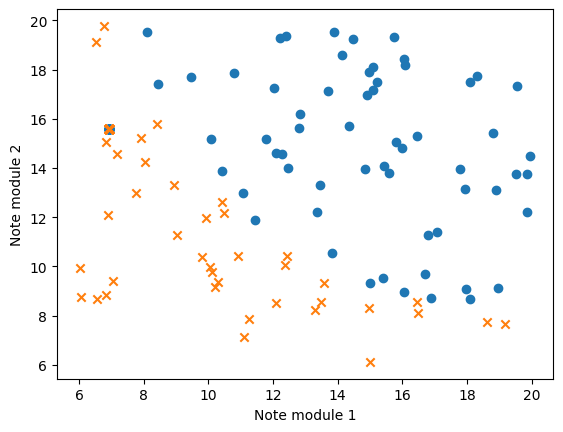

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17
print(predict_class(np.array([[1, 9, 17]]).astype(float), finalThetas))


[[1.]]


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
#y = y.reshape(y.shape[0])
LR.fit(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Comparaison des thetas & du coût

In [ ]:
print("*** THETAS ***")
skThetas = np.array([[LR.intercept_], [LR.coef_[0][1]], [LR.coef_[0][2]]]).astype(float)
print('sklearn = ')
print(skThetas)
print('ours    = ')
print(finalThetas)
print("*** COST ***")
print('sklearn = ', computeCost(X, y, skThetas))
print('ours    = ', finalCost)

*** THETAS ***
sklearn = 
[[-22.9317941 ]
 [  0.94159401]
 [  0.91667069]]
ours    = 
[[-11.96222885]
 [  0.50495791]
 [  0.47434326]]
*** COST ***
sklearn =  [[0.20429896]]
ours    =  [[0.25002751]]


<ipython-input-70-8a5dc019a058>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  skThetas = np.array([[LR.intercept_], [LR.coef_[0][1]], [LR.coef_[0][2]]]).astype(float)


Comparaison graphique

 *** sklearn decision boundary *** 


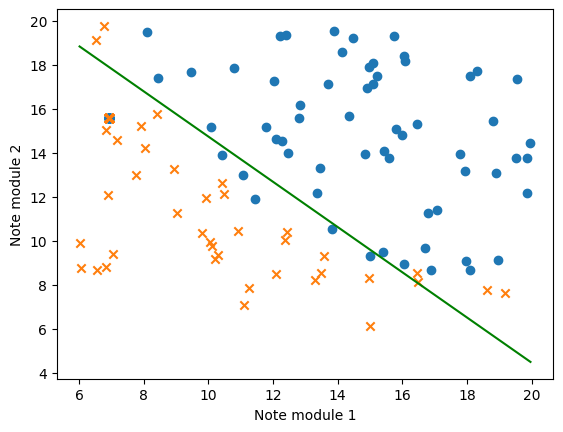


 *** our decision boundary *** 


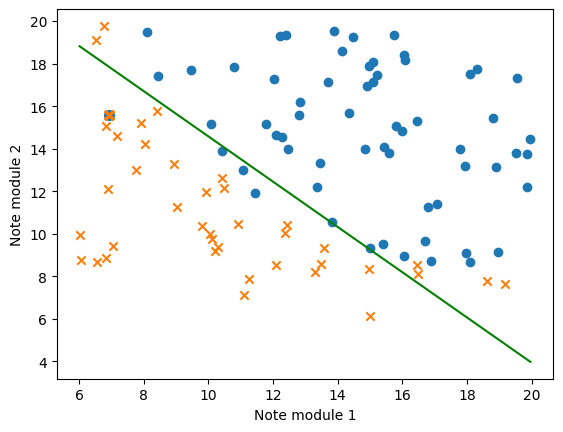

In [ ]:
print(" *** sklearn decision boundary *** ")
drawLine(X, y, skThetas)
print()
print(" *** our decision boundary *** ")
drawLine(X, y, finalThetas)

Comparaison du score d'exactitude(accuracy)

In [ ]:
print("*** Train score ***")
print("sklearn : ", LR.score(X, y))
print("ours : ", np.sum(predict_class(X, finalThetas) == y) / y.shape[0])

*** Train score ***
sklearn :  0.89
ours :  0.91


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
#

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Avril 2023


In [ ]:
# bonne chance